In [ ]:
# Let's import the pandas library
# 
import pandas as pd
import numpy as np


In [ ]:
# Loading data
Data1 = pd.read_excel ("/content/cells_geo_description.xlsx")
Data1.head()


,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [ ]:
# Loading data from CSV
Data2 = pd.read_csv ('/content/cells_geo.csv')
Data2.head()

,;VILLES;STATUS;LOCALISATION;DECOUPZONE;ZONENAME;LONGITUDE;LATITUDE;REGION;AREA;CELL_ID;SITE_CODE
0,"0;ADJAME;In Service;ABIDJAN;""""""Abidjan_EST"";AG..."
1,"1;ADJAME;In Service;ABIDJAN;""""""Abidjan_EST"";AG..."
2,"2;ADJAME;In Service;ABIDJAN;""""""Abidjan_EST"";AG..."
3,"3;ASSINIE;In Service;INTERIEUR;Grand-EST;""ASSI..."
4,"4;ASSINIE;In Service;INTERIEUR;Grand-EST;""ASSI..."


In [ ]:
# Loading data 

Data3 = pd.read_excel ("/content/CDR_description.xlsx")
Data3.head()

,Column name,Description,Format
0,PRODUCT,Voice or SMS,String
1,VALUE,Billing price,Integer
2,DATE_TIME,Time in format yyyy-MM-dd hh:mm:ss.0,String
3,CELL_ON_SITE,Which cell in the site was used (not needed here),Integer
4,DW_A_NUMBER_INT,Anonymized phone number of the person for whic...,String


 2. Data cleaning

In [ ]:

# data loading and cleaning 

Data1 = pd.read_csv('/content/cells_geo.csv',delimiter=';')
Data1.head()

 



,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [ ]:
# remove the " in DECOUPZONE and ZONENAME
Data1['DECOUPZONE'].str.replace('"','')
Data1['ZONENAME'].str.replace('"','')

0                  AGBANNEW
1                  AGBANNEW
2                  AGBANNEW
3                   ASSINIE
4                   ASSINIE
               ...         
3969    ZONE A - Grand-NORD
3970    ZONE A - Grand-NORD
3971    ZONE A - Grand-NORD
3972    ZONE A - Grand-NORD
3973    ZONE A - Grand-NORD
Name: ZONENAME, Length: 3974, dtype: object

In [ ]:
# remove the first column
Data1.iloc[: , 1:]

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...
3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3972,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c


In [ ]:
# capitalize the string values
Data1['VILLES'].str.upper()
Data1['DECOUPZONE'].str.upper()
Data1['LOCALISATION'].str.upper()
Data1['ZONENAME'].str.upper()
Data1['REGION'].str.upper()

0          LAGUNE
1          LAGUNE
2          LAGUNE
3       SUD COMOE
4       SUD COMOE
          ...    
3969     MARAHOUE
3970     MARAHOUE
3971     MARAHOUE
3972     MARAHOUE
3973     MARAHOUE
Name: REGION, Length: 3974, dtype: object

In [ ]:
# get some details about our dataframe
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3974 non-null   int64  
 1   VILLES        3974 non-null   object 
 2   STATUS        3907 non-null   object 
 3   LOCALISATION  3974 non-null   object 
 4   DECOUPZONE    3974 non-null   object 
 5   ZONENAME      3968 non-null   object 
 6   LONGITUDE     3974 non-null   float64
 7   LATITUDE      3974 non-null   float64
 8   REGION        3974 non-null   object 
 9   AREA          3951 non-null   object 
 10  CELL_ID       3974 non-null   object 
 11  SITE_CODE     3974 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 372.7+ KB


In [ ]:
Data1.describe()

,Unnamed: 0,LONGITUDE,LATITUDE
count,3974.000000,3974.000000,3974.000000
mean,1986.500000,-4.877659,6.244749
std,1147.339313,1.300771,1.304199
min,0.000000,-8.503889,0.000000
25%,993.250000,-5.846139,5.338639
50%,1986.500000,-4.084500,5.475000
75%,2979.750000,-3.993444,6.872306
max,3973.000000,-0.000000,10.481861


In [ ]:
# data loading and cleaning 

Data2 = pd.read_csv('/content/cells_geo.csv',delimiter=';')
Data2.head()

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [ ]:
# remove the " in DECOUPZONE and ZONENAME
Data2['DECOUPZONE'].str.replace('"','')
Data2['ZONENAME'].str.replace('"','')

0                  AGBANNEW
1                  AGBANNEW
2                  AGBANNEW
3                   ASSINIE
4                   ASSINIE
               ...         
3969    ZONE A - Grand-NORD
3970    ZONE A - Grand-NORD
3971    ZONE A - Grand-NORD
3972    ZONE A - Grand-NORD
3973    ZONE A - Grand-NORD
Name: ZONENAME, Length: 3974, dtype: object

In [ ]:
# get some details about our dataframe
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3974 non-null   int64  
 1   VILLES        3974 non-null   object 
 2   STATUS        3907 non-null   object 
 3   LOCALISATION  3974 non-null   object 
 4   DECOUPZONE    3974 non-null   object 
 5   ZONENAME      3968 non-null   object 
 6   LONGITUDE     3974 non-null   float64
 7   LATITUDE      3974 non-null   float64
 8   REGION        3974 non-null   object 
 9   AREA          3951 non-null   object 
 10  CELL_ID       3974 non-null   object 
 11  SITE_CODE     3974 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 372.7+ KB


In [ ]:
Data2.describe()

,Unnamed: 0,LONGITUDE,LATITUDE
count,3974.000000,3974.000000,3974.000000
mean,1986.500000,-4.877659,6.244749
std,1147.339313,1.300771,1.304199
min,0.000000,-8.503889,0.000000
25%,993.250000,-5.846139,5.338639
50%,1986.500000,-4.084500,5.475000
75%,2979.750000,-3.993444,6.872306
max,3973.000000,-0.000000,10.481861


Visualization

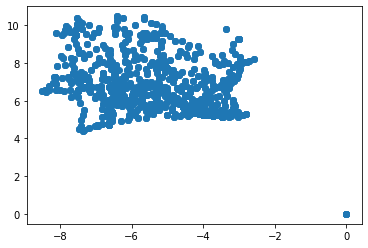

In [ ]:
# we can see the outlier cordinate here
import matplotlib.pyplot as plt
plt.scatter(x=Data['LONGITUDE'], y=Data['LATITUDE'])
plt.show()


In [ ]:
# let create a map visualization; we have longitude and latitude cordinates
# first import packages for map drawing
from shapely.geometry import Point
#import data1 as gpd
#from data1 import GeoDataFrame
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy


     |████████████████████████████████| 10.8 MB 4.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 31.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 36.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 25.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 44 kB 2.8 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516285 sha256=822d1e8bc675cfd808992dc741ad7321164eebd71c8704305bd84171e12576be
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy


In [ ]:
geometry = [Point(xy) for xy in zip(['LONGITUDE'],['LATITUDE'])]

In [ ]:
from matplotlib import get_data_path
world = Data(get_data_path.datasets.get_path('naturalearth_lowres'))
world = world[['name'] == "Ivory Coast"]
get_data_path.plot(ax=world.boundary.plot(figsize=(14, 10)), marker='o', markersize=15,edgecolor='k',cmap='OrRd')